## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/bourne_scenario.csv")

In [3]:
df.head()

,page_no,scene_title,text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...


#### Feature Description
- page_no : 데이터가 위치한 pdf 페이지 정보
- scene_title : 씬 제목
- text : 씬에 해당하는 지문/대본 텍스트 정보

-----

## 2) 데이터셋 살펴보기

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
df.shape

(320, 3)

In [5]:
df.isnull().sum()

page_no        0
scene_title    0
text           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   page_no      320 non-null    int64 
 1   scene_title  320 non-null    object
 2   text         320 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


In [ ]:
df['text'][0]

" 1                It's raining...                Light strobes across the wet glass at a rhythmic pace...                 Suddenly -- through the window a face -- JASON BOURNE --               riding in the backseat -- his gaze fixed.      "

In [ ]:
df['text'][5]

" 4                MARIE getting BOURNE into the bed.  Turning down the light.               Getting him settled.  Waiting for that pill to kick in.               What would he do without her?                                       BOURNE                         I'm trying, Marie, Okay?                                       MARIE                         I worry when you get like this.                3.                                       BOURNE                         It's just a nightmare.                                       MARIE                         I don't mean that.  I worry when you try                         to ignore it.                 He hesitates.  But that gets him.  He knows she's right.               And with that opening, he's letting go.  Resistance               folding.  Almost childlike.  She's gathering him in.               He's letting her do it...                                       MARIE (CONT'D)                         Sleep.  Sleep now.               

In [ ]:
len(df['text'].values.sum())

204413

-----

## 3) 텍스트 데이터 전처리

### 3-1) 정규 표현식 적용

In [7]:
df['text'][0]

" 1                It's raining...                Light strobes across the wet glass at a rhythmic pace...                 Suddenly -- through the window a face -- JASON BOURNE --               riding in the backseat -- his gaze fixed.      "

In [8]:
import re

def apply_regular_expression(text):
    text = text.lower()
    english = re.compile('[^ a-z]')
    result = english.sub('', text)
    result = re.sub(' +', ' ', result)
    return result

In [9]:
apply_regular_expression(df['text'][0])

' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed '

In [10]:
df['processed_text'] = df['text'].apply(lambda x: apply_regular_expression(x))
df.head()

,page_no,scene_title,text,processed_text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...


### 3-2) Word Count

##### 말뭉치(코퍼스) 생성

In [11]:
# make corpus
corpus = df['processed_text'].tolist()
corpus

[' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed ',
 ' a on his knee a syringe and a gun the eyes of the driver jarda watching bournes pov the passenger back of his head cell phone rings the head turns its conklin bourne returns his stare ',
 ' bournes eyes open panicked gasping trying to stay quiet marie sleeps ',
 ' a bourne moving for the medicine cabinet digs through the medicine cabinet downs something specific ',
 ' one minute later bourne moves out onto the veranda marie pads in watching him for a moment concerned clearly its not the first time this has happened they both look different than last we saw them his hair is longer shes a blonde hippie travelers their cottage is humble but sweet the bedroom opens to a beach and a town just down the hill club music from some all night rave wafting in from the far distance marie where were you jason bourne in the car conklin up fro

##### BoW 벡터 생성

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# filter stop words
vect = CountVectorizer(tokenizer=None, stop_words="english", analyzer='word').fit(corpus)
bow_vect = vect.fit_transform(corpus)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [13]:
word_list

['aa',
 'ab',
 'abandoned',
 'abandons',
 'abbott',
 'abbottnow',
 'abbottphone',
 'abbotts',
 'abend',
 'able',
 'aboott',
 'aboutfaces',
 'absolutely',
 'abyss',
 'accelerating',
 'accented',
 'accepting',
 'accepts',
 'access',
 'accompanying',
 'accomplished',
 'account',
 'acknowledged',
 'act',
 'activity',
 'actually',
 'address',
 'adjust',
 'adrenaline',
 'affirmative',
 'afford',
 'afraid',
 'afternoon',
 'againi',
 'agencies',
 'agency',
 'agent',
 'agents',
 'agitated',
 'ago',
 'agreement',
 'agrees',
 'ah',
 'ahead',
 'aim',
 'aimed',
 'air',
 'airport',
 'alarm',
 'alert',
 'alexanderplatz',
 'alive',
 'alley',
 'alleys',
 'allocation',
 'allpoints',
 'alongside',
 'alps',
 'alright',
 'alrighti',
 'alrighttake',
 'american',
 'ammo',
 'amnesia',
 'amused',
 'anger',
 'angle',
 'ankle',
 'anonymous',
 'answer',
 'answering',
 'answers',
 'anymore',
 'anythings',
 'apology',
 'appealing',
 'appear',
 'appearing',
 'appears',
 'approached',
 'approaches',
 'approaching',
 

In [14]:
count_list

array([ 3,  3,  2, ...,  1, 42,  3])

In [15]:
bow_vect.shape

(320, 2850)

In [16]:
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
bow_vect.toarray().sum(axis=0)

array([ 3,  3,  2, ...,  1, 42,  3])

In [18]:
bow_vect.toarray().sum(axis=0).shape

(2850,)

In [19]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'aa': 3,
 'ab': 3,
 'abandoned': 2,
 'abandons': 1,
 'abbott': 128,
 'abbottnow': 1,
 'abbottphone': 4,
 'abbotts': 3,
 'abend': 2,
 'able': 1,
 'aboott': 1,
 'aboutfaces': 1,
 'absolutely': 1,
 'abyss': 1,
 'accelerating': 1,
 'accented': 1,
 'accepting': 1,
 'accepts': 1,
 'access': 3,
 'accompanying': 1,
 'accomplished': 1,
 'account': 3,
 'acknowledged': 1,
 'act': 1,
 'activity': 2,
 'actually': 3,
 'address': 3,
 'adjust': 1,
 'adrenaline': 1,
 'affirmative': 1,
 'afford': 1,
 'afraid': 1,
 'afternoon': 1,
 'againi': 1,
 'agencies': 1,
 'agency': 5,
 'agent': 2,
 'agents': 2,
 'agitated': 1,
 'ago': 10,
 'agreement': 2,
 'agrees': 1,
 'ah': 1,
 'ahead': 17,
 'aim': 1,
 'aimed': 1,
 'air': 9,
 'airport': 2,
 'alarm': 3,
 'alert': 1,
 'alexanderplatz': 3,
 'alive': 9,
 'alley': 2,
 'alleys': 1,
 'allocation': 1,
 'allpoints': 1,
 'alongside': 1,
 'alps': 1,
 'alright': 2,
 'alrighti': 1,
 'alrighttake': 1,
 'american': 4,
 'ammo': 1,
 'amnesia': 5,
 'amused': 1,
 'anger': 1,
 'ang

In [ ]:
import operator

sorted(word_count_dict.items(), key=operator.itemgetter(1), reverse=True)

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63),
 ('know', 61),
 ('car', 51),
 ('away', 48),
 ('room', 44),
 ('jarda', 43),
 ('looks', 43),
 ('dont', 42),
 ('zorn', 42),
 ('phone', 40),
 ('right', 39),
 ('theres', 39),
 ('police', 38),
 ('want', 38),
 ('berlin', 37),
 ('teddy', 35),
 ('nevins', 34),
 ('youre', 34),
 ('got', 33),
 ('im', 33),
 ('way', 33),
 ('like', 32),
 ('door', 31),
 ('gretkov', 31),
 ('coming', 30),
 ('look', 30),
 ('bournes', 29),
 ('conklin', 29),
 ('hotel', 28),
 ('shes', 28),
 ('going', 27),
 ('looking', 27),
 ('time', 27),
 ('irena', 26),
 ('thats', 26),
 ('eyes', 25),
 ('left', 25),
 ('suddenly', 25),
 ('treadstone', 25),
 ('cab', 24),
 ('trying', 24),
 ('window', 24),
 ('pov', 23),
 ('turns', 23),
 ('waiting', 23),
 ('beat', 22),
 ('cops', 22),
 ('dead', 22),
 ('face', 22),
 ('gun', 22),
 ('hands', 22),
 ('moscow', 22),
 ('people', 22),
 ('stre

##### 단어 분포 탐색

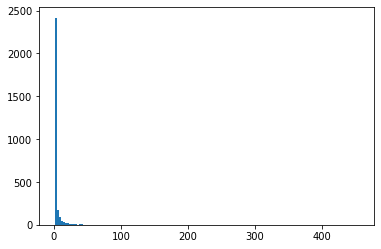

In [ ]:
plt.hist(list(word_count_dict.values()), bins=150)
plt.show()

-----

## 4) 텍스트 마이닝

### 4-1) 단어별 빈도 분석

##### 워드 클라우드 시각화

In [ ]:
!pip install pytagcloud pygame simplejson

     |████████████████████████████████| 757kB 2.8MB/s 
     |████████████████████████████████| 11.4MB 15.2MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-cp36-none-any.whl size=759867 sha256=0e07a63c4e676c2c5ba4c3d7278fd636ff2dcb0c0ab3b332058e41da6ba40b43
  Stored in directory: /root/.cache/pip/wheels/08/bf/d4/8899fd82d7f62af5960d17cc59b80edae474380b92828c8c1f
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114208 sha256=f4125688de2047d768487702ec9d89b06a9ed94d4d6293e1c53350536b002b0c
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built pytagcloud simplejson


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


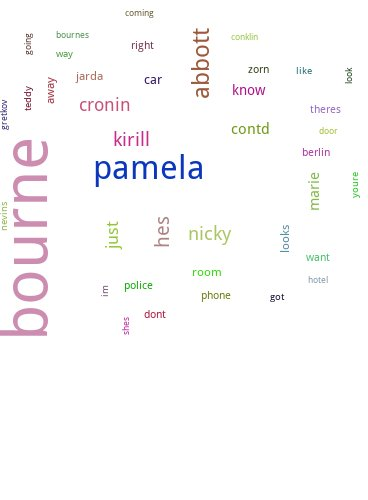

In [ ]:
from collections import Counter

import random
import pytagcloud
import webbrowser

ranked_tags = Counter(word_count_dict).most_common(25)
taglist = pytagcloud.make_tags(sorted(word_count_dict.items(), key=operator.itemgetter(1), reverse=True)[:40], maxsize=60)
pytagcloud.create_tag_image(taglist, 'wordcloud_example.jpg', 
                            rectangular=False)

from IPython.display import Image
Image(filename='wordcloud_example.jpg')

##### 상위 빈도수 단어 출력

In [ ]:
Counter(word_count_dict).most_common(25)

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63),
 ('know', 61),
 ('car', 51),
 ('away', 48),
 ('room', 44),
 ('jarda', 43),
 ('looks', 43),
 ('dont', 42),
 ('zorn', 42),
 ('phone', 40),
 ('right', 39),
 ('theres', 39),
 ('police', 38),
 ('want', 38),
 ('berlin', 37),
 ('teddy', 35)]

-----

### 4-2) 장면별 중요 단어 시각화

##### TF-IDF 변환

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)
print(tf_idf_vect[0])

(320, 2850)
  (0, 2788)	0.19578974958217082
  (0, 2763)	0.27550455848587985
  (0, 2412)	0.1838379942679887
  (0, 2387)	0.3109660261831164
  (0, 1984)	0.2902223973596984
  (0, 1978)	0.3109660261831164
  (0, 1898)	0.27550455848587985
  (0, 1673)	0.2902223973596984
  (0, 1366)	0.21520447034992146
  (0, 1251)	0.19855583314180728
  (0, 1001)	0.2340173008390438
  (0, 974)	0.2902223973596984
  (0, 874)	0.27550455848587985
  (0, 798)	0.1906694714764746
  (0, 237)	0.08646242181596513
  (0, 125)	0.26408851574819875


In [ ]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 2850)
[[0. 0. 0. ... 0. 0. 0.]]


##### 벡터 : 단어 맵핑

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{1898: 'raining', 1366: 'light', 2387: 'strobes', 2763: 'wet', 1001: 'glass', 1978: 'rhythmic', 1673..


##### 중요 단어 추출 - Top 3 TF-IDF

In [ ]:
np.argsort(tf_idf_vect[0].toarray())[0][-3:]

array([1984, 2387, 1978])

In [ ]:
np.argsort(tf_idf_vect.toarray())[:, -3:]

array([[1984, 2387, 1978],
       [1297, 1971, 1097],
       [1693, 2221,  968],
       [ 690,  299, 1482],
       [2823, 1951, 1454],
       [2218, 2815, 1454],
       [2038,  737, 2418],
       [ 852, 2761, 2570],
       [2022,  156, 1352],
       [2250, 2241, 1454],
       [ 342,  321, 2188],
       [ 614, 1557, 1534],
       [ 535, 1884, 1614],
       [2188,  139,   20],
       [ 503,  730, 1458],
       [2790, 2384,  724],
       [ 169,  915, 2444],
       [1905, 1259,   53],
       [2566, 1335,  828],
       [2300,  281, 1702],
       [2503, 1502, 2567],
       [ 794, 1454, 1018],
       [ 698, 2559, 1252],
       [1871,  237, 1454],
       [ 204,  911, 2591],
       [ 237,  596, 1454],
       [  52,  941, 1036],
       [ 211, 1156,  206],
       [1193, 2712, 1454],
       [  52, 1809, 2462],
       [ 237, 1454,  702],
       [2130,  237, 1454],
       [1995, 1890,  321],
       [1011,  259, 1454],
       [1985, 2216, 1819],
       [ 420, 2276, 1454],
       [2019, 1103, 2059],
 

In [ ]:
top_3_word = np.argsort(tf_idf_vect.toarray())[:, -3:]
df['important_word_indexes'] = pd.Series(top_3_word.tolist())
df.head()

,page_no,scene_title,text,processed_text,important_word_indexes
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]"


In [ ]:
def convert_to_word(x):
    word_list = []
    for word in x:
        word_list.append(invert_index_vectorizer[word])
    return word_list

In [ ]:
df['important_words'] = df['important_word_indexes'].apply(lambda x: convert_to_word(x))
df.head()

,page_no,scene_title,text,processed_text,important_word_indexes,important_words
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]","[riding, strobes, rhythmic]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]","[knee, returns, head]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]","[panicked, sleeps, gasping]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]","[downs, cabinet, medicine]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]","[write, remember, marie]"
